In [2039]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import set_config
set_config(print_changed_only=False)
import matplotlib.pyplot as plt

In [2040]:
df = pd.read_csv('cleaned_merged_file.csv')
df = df.dropna()
df

,Movie Name,CSS,Language,Runtime (min.),IMDb_Rating,Animated,Genre,Fantasy,Drama,Music,...,Lead_Actor,Lead_Actress,Director,Budget,BO Collection (Total),Trailer Views,Trailer Likes (K),Music_Rating,No. of Screens,Verdict
0,interstellar,0.300000,English,169,8.7,Live Action,"Adventure, drama, sci-fi",1,1,1,...,Matthew David McConaughey,Anne Jacqueline Hathaway,Christopher Nolan,165.0,773.80,36314005,202.0,8.5,20000.0,Blockbuster
1,thedarkknight,0.400000,English,152,9.0,Live Action,"Action,crime,drama",0,1,1,...,Christian Bale,Anne Hathaway,Christopher Nolan,18.5,100.60,180000000,185.0,9.4,4300.0,Hit
5,pathaan,0.000000,Hindi,146,5.9,Live Action,"Action, Thriller,Adventure",0,1,1,...,Shah Rukh Khan,Deepika Padukone,Siddharth Anand,225.0,1050.30,95215450,2400.0,8.0,6000.0,Blockbuster
6,raone,0.300000,Hindi,156,4.7,Live Action,"Action, Adventure, Sci-fi",0,0,1,...,Shah Rukh Khan,Kareena Kapore,Anubhav Sinha,150.0,207.00,2284960,11.0,6.0,5000.0,Flop
11,ballabhpurerroopkotha,0.476190,Bengali,136,8.1,Live Action,"Supernatural, comedy, drama, romance",0,1,1,...,Satyam Bhattacharya,Surangana Bandyopadhyay,Anirban Bhattacharya,3.0,5.01,5416555,16.0,7.7,2000.0,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,hollowman,0.166667,English,112,5.7,Live Action,"Action, Horror, Sci-Fi, Thriller",0,0,0,...,Kevin Bacon,Elisabeth Shue,Paul Verhoeven,95.0,190.20,190213455,3244.0,5.7,3000.0,Hit
495,theinterpreter,0.461538,English,128,6.4,Live Action,"Crime, Mystery, Thriller",0,1,0,...,Nicole Kidman,Sean Penn,Sydney Pollack,95.0,162.90,190213455,3244.0,6.5,4000.0,Average
496,percyjacksonseaofmonsters,0.150000,English,106,5.8,Live Action,"Adventure, Family, Fantasy, Thriller",1,0,0,...,Logan Lerman,Alexandra Daddario,Thor Freudenthal,90.0,199.80,202359711,3778.0,5.8,1000.0,Average
497,laracrofttombraiderthecradleoflife,0.300000,English,117,5.5,Live Action,"Action, Adventure, Fantasy, Thriller",0,1,0,...,Angelina Jolie,Gerard Butler,Jan de Bont,95.0,156.50,65653758,3515.0,5.5,3000.0,Average


In [2041]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_verdict = LabelEncoder()

In [2042]:
verdict_labels = ["Hit", "Superhit", "Flop", "Blockbuster", "Average", "Disaster"] 

In [2043]:
df['Animated'] = le.fit_transform(df['Animated'])
df['Lead_Actor'] = le.fit_transform(df['Lead_Actor'])
df['Lead_Actress'] = le.fit_transform(df['Lead_Actress'])
df['Language'] = le.fit_transform(df['Language'])
df['Director'] = le.fit_transform(df['Director'])
df['Verdict'] = le_verdict.fit_transform(df['Verdict'])
df

,Movie Name,CSS,Language,Runtime (min.),IMDb_Rating,Animated,Genre,Fantasy,Drama,Music,...,Lead_Actor,Lead_Actress,Director,Budget,BO Collection (Total),Trailer Views,Trailer Likes (K),Music_Rating,No. of Screens,Verdict
0,interstellar,0.300000,1,169,8.7,1,"Adventure, drama, sci-fi",1,1,1,...,129,16,39,165.0,773.80,36314005,202.0,8.5,20000.0,1
1,thedarkknight,0.400000,1,152,9.0,1,"Action,crime,drama",0,1,1,...,45,15,39,18.5,100.60,180000000,185.0,9.4,4300.0,4
5,pathaan,0.000000,2,146,5.9,1,"Action, Thriller,Adventure",0,1,1,...,170,55,196,225.0,1050.30,95215450,2400.0,8.0,6000.0,1
6,raone,0.300000,2,156,4.7,1,"Action, Adventure, Sci-fi",0,0,1,...,170,136,16,150.0,207.00,2284960,11.0,6.0,5000.0,3
11,ballabhpurerroopkotha,0.476190,0,136,8.1,1,"Supernatural, comedy, drama, romance",0,1,1,...,167,249,14,3.0,5.01,5416555,16.0,7.7,2000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,hollowman,0.166667,1,112,5.7,1,"Action, Horror, Sci-Fi, Thriller",0,0,0,...,112,61,149,95.0,190.20,190213455,3244.0,5.7,3000.0,4
495,theinterpreter,0.461538,1,128,6.4,1,"Crime, Mystery, Thriller",0,1,0,...,141,239,209,95.0,162.90,190213455,3244.0,6.5,4000.0,0
496,percyjacksonseaofmonsters,0.150000,1,106,5.8,1,"Adventure, Family, Fantasy, Thriller",1,0,0,...,120,4,212,90.0,199.80,202359711,3778.0,5.8,1000.0,0
497,laracrofttombraiderthecradleoflife,0.300000,1,117,5.5,1,"Action, Adventure, Fantasy, Thriller",0,1,0,...,12,85,85,95.0,156.50,65653758,3515.0,5.5,3000.0,0


In [2044]:
max_encoded_value = max(le_verdict.classes_)
print(le_verdict.classes_)
max_encoded_value

['Average' 'Blockbuster' 'Disaster' 'Flop' 'Hit' 'Superhit']


'Superhit'

In [2045]:
le_name_mapping = dict(zip(le_verdict.classes_, le_verdict.transform(le_verdict.classes_)))
le_name_mapping

{'Average': 0,
 'Blockbuster': 1,
 'Disaster': 2,
 'Flop': 3,
 'Hit': 4,
 'Superhit': 5}

In [2046]:
X = df.drop('Verdict', axis='columns')
X = df.drop('Movie Name', axis='columns')
X.drop('Genre', axis='columns', inplace=True)
# X['CSS'] = X['CSS'].fillna(X['CSS'].median())
# X['No. of Screens'] = X['No. of Screens'].fillna(X['No. of Screens'].median())
X


,CSS,Language,Runtime (min.),IMDb_Rating,Animated,Fantasy,Drama,Music,Adventure,Thriller,...,Lead_Actor,Lead_Actress,Director,Budget,BO Collection (Total),Trailer Views,Trailer Likes (K),Music_Rating,No. of Screens,Verdict
0,0.300000,1,169,8.7,1,1,1,1,1,1,...,129,16,39,165.0,773.80,36314005,202.0,8.5,20000.0,1
1,0.400000,1,152,9.0,1,0,1,1,1,1,...,45,15,39,18.5,100.60,180000000,185.0,9.4,4300.0,4
5,0.000000,2,146,5.9,1,0,1,1,1,0,...,170,55,196,225.0,1050.30,95215450,2400.0,8.0,6000.0,1
6,0.300000,2,156,4.7,1,0,0,1,1,0,...,170,136,16,150.0,207.00,2284960,11.0,6.0,5000.0,3
11,0.476190,0,136,8.1,1,0,1,1,0,0,...,167,249,14,3.0,5.01,5416555,16.0,7.7,2000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.166667,1,112,5.7,1,0,0,0,0,1,...,112,61,149,95.0,190.20,190213455,3244.0,5.7,3000.0,4
495,0.461538,1,128,6.4,1,0,1,0,0,0,...,141,239,209,95.0,162.90,190213455,3244.0,6.5,4000.0,0
496,0.150000,1,106,5.8,1,1,0,0,1,0,...,120,4,212,90.0,199.80,202359711,3778.0,5.8,1000.0,0
497,0.300000,1,117,5.5,1,0,1,0,1,1,...,12,85,85,95.0,156.50,65653758,3515.0,5.5,3000.0,0


In [2047]:
nan_columns = X.columns[X.isna().any()].tolist()
if nan_columns:
    print("Columns with NaN values:", nan_columns)
else:
    print("No NaN values found in any column.")

No NaN values found in any column.


In [2048]:
y = df['Verdict']
y.dropna()

0      1
1      4
5      1
6      3
11     4
      ..
494    4
495    0
496    0
497    0
498    4
Name: Verdict, Length: 357, dtype: int64

In [2049]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2050]:
model = SVC()

In [2051]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [2052]:
model.score(X_test, y_test)

0.4861111111111111

In [2053]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

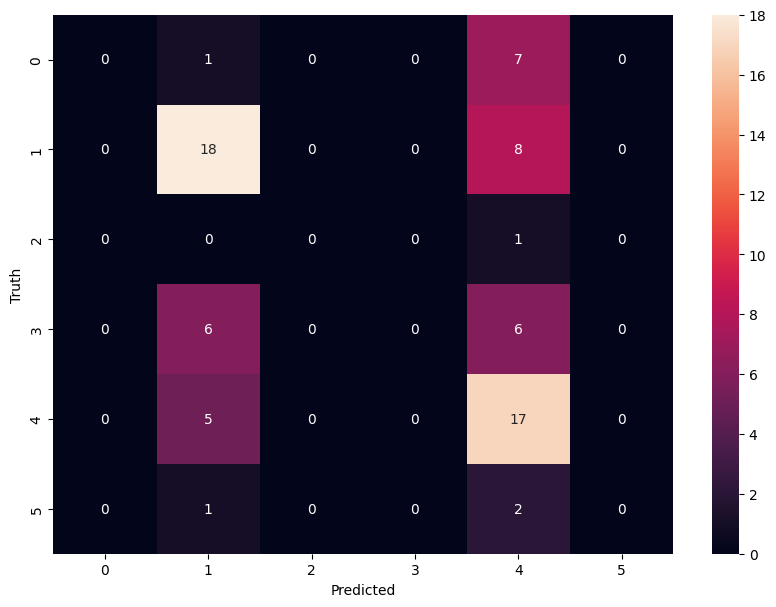

In [2054]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [2055]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_predicted)
ac

0.4861111111111111

In [2056]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predicted, average=None)
f1

array([0.        , 0.63157895, 0.        , 0.        , 0.53968254,
       0.        ])